In [1]:
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import json
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import matplotlib.patches as patches
warnings.filterwarnings("ignore")
from mplsoccer.pitch import Pitch
plt.style.use('ggplot')
from PIL import Image
from highlight_text import htext
from matplotlib import cm
import matplotlib.patheffects as path_effects

In [2]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

________________________________________________

In [3]:
events = pd.read_csv('./pepe_all.csv')

In [4]:
mask = (events['Player'] == 239872)
pepe = events.loc[mask]
pepe

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype,Assist,Assist_2nd
69,Pass,3,40.0,239872.0,607,Successful,74.7,30.0,80.2,45.7,OpenPlay,False,NaN
99,BallTouch,5,12.0,239872.0,607,Successful,57.8,10.1,NaN,NaN,OpenPlay,False,NaN
119,Challenge,6,9.0,239872.0,607,Unsuccessful,64.6,21.4,NaN,NaN,OpenPlay,False,NaN
170,Pass,9,20.0,239872.0,607,Successful,68.1,0.0,63.4,4.2,ThrowIn,False,NaN
172,Foul,9,24.0,239872.0,607,Successful,67.0,5.6,NaN,NaN,OpenPlay,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57538,Pass,89,46.0,239872.0,607,Successful,74.8,21.1,85.9,60.0,OpenPlay,False,NaN
57560,SavedShot,91,7.0,239872.0,607,Successful,81.0,40.6,NaN,NaN,OpenPlay,False,NaN
57564,Pass,91,21.0,239872.0,607,Unsuccessful,63.4,12.0,100.0,73.8,OpenPlay,False,NaN
57572,TakeOn,92,11.0,239872.0,607,Unsuccessful,64.6,12.8,NaN,NaN,OpenPlay,False,NaN


In [17]:
mask = (pepe['passtype'] == 'BigChanceCreated') & (pepe['Event'] == 'Pass') & (pepe['Assist_2nd'] != True)
pepe_bcc = pepe.loc[mask]
len(pepe_bcc)

14

In [6]:
mask = (pepe['passtype'] == 'BigChanceCreated') & (pepe['Event'] != 'Pass') & (pepe['Assist_2nd'] != True)
pepe_bcc1 = pepe.loc[mask]
len(pepe_bcc1)

1

In [7]:
mask = (pepe['Event'] == 'Goal') & (pepe['Y'] != 50) & (pepe['Event'] == 'Goal') & (pepe['Y'] != 50.7) & (pepe['Event'] == 'Goal') & (pepe['Y'] != 50.1)
pepe_goal = pepe.loc[mask]
len(pepe_goal)

13

In [8]:
mask = (pepe['Assist'] == True) & (pepe['Event'] == 'Pass')
pepe_assist = pepe.loc[mask]
len(pepe_assist)

8

In [9]:
mask = (pepe['Assist_2nd'] == True) & (pepe['Event'] == 'Pass') & ((pepe['X'] < 99) & (pepe['Y'] < 99))
pepe_assist2 = pepe.loc[mask]
len(pepe_assist2)

2

In [10]:
mask3 = (pepe['Event'] == 'MissedShots') | (pepe['Event'] == 'SavedShot')
pepe_shot = pepe.loc[mask3]
len(pepe_shot)

94

In [11]:
# mask5 = (mesut['passtype'] == 'IntentionalGoalAssist') & ((mesut['x'] > 99) & (mesut['y'] > 99)) | (mesut['passtype'] == 'IntentionalGoalAssist') & ((mesut['x'] > 99) & (mesut['y'] < 1)) & ((mesut['x'] > 99) & (mesut['y'] < 1))
# corner = mesut.loc[mask5]
# len(corner)

In [12]:
# mask5 = (mesut['passtype'] == 'BigChanceCreated') & ((mesut['x'] > 99) & (mesut['y'] < 1))
# corner1 = mesut.loc[mask5]
# corner1

In [13]:
mask5 = (pepe['passtype'] != 'IntentionalGoalAssist') & (pepe['passtype'] != 'BigChanceCreated') & (pepe['X'] < 99) & (pepe['Y'] < 99) & ((pepe['X'] > 1) & (pepe['Y'] > 1))
touch = pepe.loc[mask5]

In [14]:
# mesut["endX"] = pd.to_numeric(events["endX"])
# mesut["endY"] = pd.to_numeric(events["endY"])

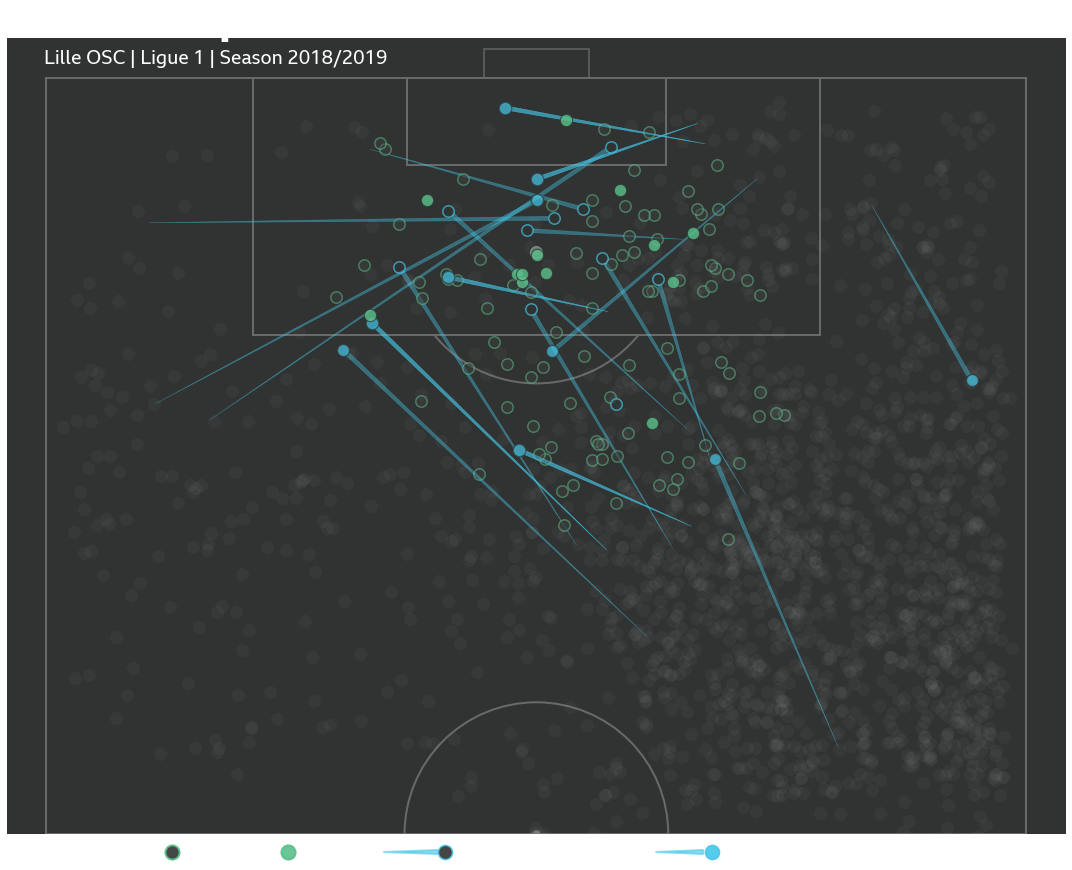

In [18]:
background = "#313332"
line = '#696969'
text_color ='white'
touches = '#f62681'
assisted = "#45c7e8"
goal = '#59c08a'
title_font = "BBC Reith Sans"
body_font = "BBC Reith Sans"

pitch = Pitch(figsize=(15,15),orientation='vertical',view='half',goal_type='box',pitch_type='opta', pad_bottom=-0.008,
              pitch_color=background, line_color=line,constrained_layout=False)

fig, ax = pitch.draw()

#touches
x = touch.X.values
y = touch.Y.values
ax.scatter(y,x,color='white', s=150, zorder=12, alpha=0.03)

#assists
style="wedge,tail_width=0.4"
xA = pepe_assist.X.values
yA = pepe_assist.Y.values
xEA = pepe_assist.endX.values
yEA = pepe_assist.endY.values

plt.scatter(yEA,xEA,color=assisted, s=150, ec=background, lw=1.5,zorder=14, alpha=0.7)

for i in range(len(pepe_assist)):
    plt.annotate('', xy=(yA[i],xA[i]), xytext=(yEA[i],xEA[i]), zorder=12, arrowprops=dict(arrowstyle=style,
            linewidth=0.5,  color='#45c7e8', shrinkA=6, alpha=0.4))
    
xA2 = pepe_assist2.X.values
yA2 = pepe_assist2.Y.values
xEA2 = pepe_assist2.endX.values
yEA2 = pepe_assist2.endY.values

plt.scatter(yEA2,xEA2,color=assisted, s=150, ec=background, lw=1.5,zorder=14, alpha=0.7)

for i in range(len(pepe_assist2)):
    plt.annotate('', xy=(yA2[i],xA2[i]), xytext=(yEA2[i],xEA2[i]), zorder=12, arrowprops=dict(arrowstyle=style,
            linewidth=0.5,  color='#45c7e8', shrinkA=6, alpha=0.4))

    
#chances created
xC = pepe_bcc.X.values
yC = pepe_bcc.Y.values
xEC = pepe_bcc.endX.values
yEC = pepe_bcc.endY.values
plt.scatter(yEC,xEC,c=background, ec=assisted,lw=1.5, s=130, zorder=12, alpha=0.7)

for i in range(len(pepe_bcc)):
    plt.annotate('', xy=(yC[i],xC[i]), xytext=(yEC[i],xEC[i]), zorder=7, arrowprops=dict(arrowstyle=style,
            linewidth=0.5,  color='#45c7e8', shrinkA=6, alpha=0.4))

xC1 = pepe_bcc1.X.values
yC1 = pepe_bcc1.Y.values
plt.scatter(yC1,xC1,c=background, ec=assisted,lw=1.5, s=130, zorder=12, alpha=0.7)    

    
#shots
xS = pepe_shot.X.values
yS = pepe_shot.Y.values

plt.scatter(yS,xS,color=background, ec=goal, lw=1.5, s=130, zorder=10, alpha=0.5)

#goals
xG = pepe_goal.X.values
yG = pepe_goal.Y.values
plt.scatter(yG,xG,color=goal, ec=background, lw=1, s=150, zorder=15, alpha=0.8)

fig.text(0.044, 0.8723, "Nicolas Pépé",fontsize=35, fontfamily=body_font, color=text_color, weight='bold',zorder=2)
fig.text(0.044, 0.845, "Lille OSC | Ligue 1 | Season 2018/2019",fontsize=19, fontfamily=body_font, color=text_color,zorder=2)


ax3 = fig.add_axes([0.03,0.105,0.05,0.02])
ax3.axis("off")
ax3.scatter([0.03],[0.05],c='white', s=200, zorder=12, alpha=0.3)
fig.text(0.065, 0.11, "all passes",fontsize=16, fontfamily=body_font, color=text_color)

ax4 = fig.add_axes([0.138,0.105,0.05,0.02])
ax4.axis("off")
ax4.scatter([0.138],[0.05],ec=goal, c=background, s=200, linewidth=2, zorder=12, alpha=0.9)
fig.text(0.175, 0.11, "shots: 110",fontsize=16, fontfamily=body_font, color=text_color)

ax5 = fig.add_axes([0.245,0.105,0.05,0.02])
ax5.axis("off")
ax5.scatter([0.245],[0.05],c=goal, s=200, linewidth=2, zorder=12, alpha=0.9)
fig.text(0.282, 0.11, "goals: 22",fontsize=16, fontfamily=body_font, color=text_color)

ax6 = fig.add_axes([0.34,0.105,0.05,0.02])
ax6.axis("off")
ax6.annotate('', [0.34,0.5],[1.5,0.5], zorder=7, arrowprops=dict(arrowstyle=style,
            linewidth=2,  color=assisted, shrinkA=6, alpha=0.6))

ax7 = fig.add_axes([0.39,0.105,0.05,0.02])
ax7.axis("off")
ax7.scatter([0.39],[0.05],ec=assisted, c=background, s=200, linewidth=1.5, zorder=12, alpha=0.9)
fig.text(0.4265, 0.11, "big chances created: 16",fontsize=16, fontfamily=body_font, color=text_color)

ax8 = fig.add_axes([0.58,0.105,0.05,0.02])
ax8.axis("off")
ax8.annotate('', [0.58,0.5],[1.6,0.5], zorder=7, arrowprops=dict(arrowstyle=style,
            linewidth=2,  color=assisted, shrinkA=6, alpha=0.6))

ax9 = fig.add_axes([0.633,0.105,0.06,0.02])
ax9.axis("off")
ax9.scatter([0.633],[0.05], c=assisted, s=200, linewidth=1.5, zorder=12, alpha=0.9)
fig.text(0.675, 0.11, "assists: 11",fontsize=16, fontfamily=body_font, color=text_color)

fig.text(0.851, 0.112, "*penalties removed",fontsize=13, fontfamily=body_font, color=text_color, fontstyle='italic')
fig.text(0.851, 0.8723, "@jonollington",fontsize=16, fontfamily=body_font, color=text_color,)
plt.rcParams['axes.facecolor']=background
plt.rcParams['savefig.facecolor']=background
plt.savefig("pepe",bbox_inches="tight",dpi=300);

In [47]:
cont = pd.read_html('https://fbref.com/en/comps/Big5/2018-2019/stats/players/2018-2019-Big-5-European-Leagues-Stats')[0]

In [48]:
def drop_header(df):
    my_df = df.copy()
    my_df = my_df.droplevel(0, axis=1)
    return(my_df)

In [49]:
cont = drop_header(cont)

In [50]:
def cleaner(df):
    all_columns = list(df.columns)
    unwanted_columns = {'Player','Comp'}
    index_columns = [ele for ele in all_columns if ele not in unwanted_columns]
    num_df = df.loc[:,index_columns].apply(pd.to_numeric, errors='coerce')
    num_df.fillna(0, inplace=True)
    master_df = pd.concat([df[['Player', 'Comp']], num_df], axis = 1)
    return master_df   

In [51]:
cont = cleaner(cont)

In [52]:
mask = cont['G+A'] > 0
cont = cont.loc[mask]

In [53]:
mask2=(cont['Player']=='Nicolas Pépé')
pepe=cont[mask2]
pepe

,Player,Comp,Rk,Nation,Pos,Squad,Age,Born,MP,Starts,Min,Gls,Gls,Ast,Ast,PK,PKatt,CrdY,CrdR,Gls,Gls,Ast,Ast,G+A,G-PK,G+A-PK,xG,xG,npxG,npxG,xA,xA,xG,xG,xA,xA,xG+xA,npxG,npxG,npxG+xA,Matches
1986,Nicolas Pépé,fr Ligue 1,1911.0,0.0,0.0,0.0,23.0,1995.0,38.0,37.0,3324.0,22.0,0.6,11.0,0.3,9.0,10.0,1.0,0.0,22.0,0.6,11.0,0.3,0.89,0.35,0.65,21.0,0.57,13.4,0.36,8.3,0.23,21.0,0.57,8.3,0.23,0.79,13.4,0.36,0.59,0.0


In [54]:
cont

,Player,Comp,Rk,Nation,Pos,Squad,Age,Born,MP,Starts,Min,Gls,Gls,Ast,Ast,PK,PKatt,CrdY,CrdR,Gls,Gls,Ast,Ast,G+A,G-PK,G+A-PK,xG,xG,npxG,npxG,xA,xA,xG,xG,xA,xA,xG+xA,npxG,npxG,npxG+xA,Matches
1,Patrick van Aanholt,eng Premier League,2.0,0.0,0.0,0.0,27.0,1990.0,36.0,36.0,3195.0,3.0,0.08,2.0,0.06,0.0,0.0,3.0,0.0,3.0,0.08,2.0,0.06,0.14,0.08,0.14,2.7,0.08,2.7,0.08,3.9,0.11,2.7,0.08,3.9,0.11,0.19,2.7,0.08,0.19,0.0
5,Mehdi Abeid,fr Ligue 1,6.0,0.0,0.0,0.0,25.0,1992.0,26.0,23.0,2023.0,3.0,0.13,0.0,0.00,1.0,1.0,6.0,0.0,3.0,0.13,0.0,0.00,0.13,0.09,0.09,3.1,0.14,2.3,0.10,1.5,0.06,3.1,0.14,1.5,0.06,0.20,2.3,0.10,0.17,0.0
9,Francesco Acerbi,it Serie A,10.0,0.0,0.0,0.0,30.0,1988.0,37.0,37.0,3309.0,3.0,0.08,1.0,0.03,0.0,0.0,4.0,1.0,3.0,0.08,1.0,0.03,0.11,0.08,0.11,3.0,0.08,3.0,0.08,0.6,0.02,3.0,0.08,0.6,0.02,0.10,3.0,0.08,0.10,0.0
10,Afriyie Acquah,it Serie A,11.0,0.0,0.0,0.0,26.0,1992.0,28.0,19.0,1510.0,2.0,0.12,0.0,0.00,0.0,0.0,4.0,0.0,2.0,0.12,0.0,0.00,0.12,0.12,0.12,1.5,0.09,1.5,0.09,0.6,0.04,1.5,0.09,0.6,0.04,0.13,1.5,0.09,0.13,0.0
11,Tyler Adams,de Bundesliga,12.0,0.0,0.0,0.0,19.0,1999.0,10.0,8.0,721.0,0.0,0.00,2.0,0.25,0.0,0.0,0.0,0.0,0.0,0.00,2.0,0.25,0.25,0.00,0.25,0.2,0.03,0.2,0.03,0.7,0.09,0.2,0.03,0.7,0.09,0.12,0.2,0.03,0.12,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2756,Steven Zuber,de Bundesliga,2651.0,0.0,0.0,0.0,26.0,1991.0,9.0,6.0,571.0,0.0,0.00,1.0,0.16,0.0,0.0,1.0,0.0,0.0,0.00,1.0,0.16,0.16,0.00,0.16,0.7,0.11,0.7,0.11,1.5,0.23,0.7,0.11,1.5,0.23,0.34,0.7,0.11,0.34,0.0
2757,Steven Zuber,de Bundesliga,2652.0,0.0,0.0,0.0,26.0,1991.0,13.0,13.0,1051.0,5.0,0.43,1.0,0.09,1.0,1.0,3.0,0.0,5.0,0.43,1.0,0.09,0.51,0.34,0.43,2.5,0.22,1.8,0.15,2.0,0.17,2.5,0.22,2.0,0.17,0.39,1.8,0.15,0.33,0.0
2761,David Zurutuza,es La Liga,2656.0,0.0,0.0,0.0,32.0,1986.0,21.0,13.0,1222.0,2.0,0.15,0.0,0.00,0.0,0.0,2.0,0.0,2.0,0.15,0.0,0.00,0.15,0.15,0.15,1.5,0.11,1.5,0.11,0.3,0.02,1.5,0.11,0.3,0.02,0.14,1.5,0.11,0.14,0.0
2762,Filip Đorđević,it Serie A,2657.0,0.0,0.0,0.0,30.0,1987.0,13.0,6.0,634.0,1.0,0.14,1.0,0.14,0.0,0.0,1.0,0.0,1.0,0.14,1.0,0.14,0.28,0.14,0.28,2.7,0.38,2.7,0.38,0.4,0.06,2.7,0.38,0.4,0.06,0.44,2.7,0.38,0.44,0.0


In [55]:
cont = cont[['Player', 'Nation','Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP', 'G+A']]

In [56]:
# Drop columns
df1 = cont.drop(['Player', 'Nation','Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP'], axis=1)

In [80]:
DFNom=df1.rank(pct=True)

In [81]:
# #Normalize data
# DFNom = df1.transform(lambda x: (x - x.min())/ (x.max() - x.min()))

In [82]:
DFNom

,G+A
1,0.326021
5,0.298598
9,0.239793
10,0.271176
11,0.558501
...,...
2756,0.386350
2757,0.847044
2761,0.359232
2762,0.606033


In [83]:
master_df = pd.concat([cont[['Player','Pos','Squad','Comp','Age']], DFNom], axis = 1)
master_df

,Player,Pos,Squad,Comp,Age,G+A
1,Patrick van Aanholt,0.0,0.0,eng Premier League,27.0,0.326021
5,Mehdi Abeid,0.0,0.0,fr Ligue 1,25.0,0.298598
9,Francesco Acerbi,0.0,0.0,it Serie A,30.0,0.239793
10,Afriyie Acquah,0.0,0.0,it Serie A,26.0,0.271176
11,Tyler Adams,0.0,0.0,de Bundesliga,19.0,0.558501
...,...,...,...,...,...,...
2756,Steven Zuber,0.0,0.0,de Bundesliga,26.0,0.386350
2757,Steven Zuber,0.0,0.0,de Bundesliga,26.0,0.847044
2761,David Zurutuza,0.0,0.0,es La Liga,32.0,0.359232
2762,Filip Đorđević,0.0,0.0,it Serie A,30.0,0.606033


In [92]:
hist = np.histogram(master_df['G+A'], bins=100)

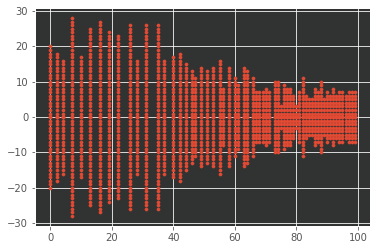

In [93]:
y_offset = 1
xdf = []
ydf = []
x = 0
for n in hist[0]:
    if (n % 2) == 0:
        half = int(n / 2)
    else:
        half = int((n - 1) / 2)
        xdf.append(x)
        ydf.append(0)
    for y in range(0, half):
        xdf.append(x)
        ydf.append(y * y_offset)
    for y in range(0, half):
        xdf.append(x)
        ydf.append(-1 * y * y_offset)
    x = x + 1

plt.scatter(xdf, ydf, marker="o", s=10);